<h1 align=center><font size = 8>Situación Covid-19 en Galicia</font></h1>

El propósito de este notebook es capturar de la <a href="https://coronavirus.sergas.gal/datos/#/gl-ES/undefined">web del Sergas</a> los datos actualizados de la situación de Galicia frente al Covid-19, y posteriormente realizar algunos análisis básicos, guardando los resultados en directorios.

Para los cálculos basados en el número de habitantes se emplea un fichero csv obteniendo mediante otro notebook, llamado _Población Areas_ y también disponible en el repositorio de GitHub. Se debe de tener en cuenta que en este análisis se trabaja con áreas sanitarias y no con ayuntamientos. Pese a que todos los nombres de las áreas sanitarias coinciden también con nombres de ayuntamientos, en ellas se encuentran englobadas otras comarcas y ayuntamientos limítrofes y próximas.

In [1]:
from classes.covid19galicia import covid19galicia
import pandas as pd

# 1. Importación de datos

Creamos la clase que maneja los datos de la web del Sergas e importamos solamente aquellos que son necesarios para las futuras gráficas.

In [2]:
galicia = covid19galicia()
casos_activos = galicia.getCifrasTotais()
infectados_fecha = galicia.getInfeccionesPorFecha()
camas = galicia.getOcupacionCamas()
fallecidos = galicia.getActivosCuradosFallecidos()
inc14 = galicia.getIncidenciaConcello()

Ultima actualización: 2021-04-17


Podemos visualizar los datos del último día:

In [3]:
total = galicia.getCifrasTotais()
print('En las últimas 24h hubo {} casos en Galicia'.format(total['Casos_Confirmados_PCR_Ultimas24h'].sum()))
total

En las últimas 24h hubo 173 casos en Galicia


,Fecha,Area_Sanitaria,Casos_Totais,Casos_Confirmados_PCR_Ultimas24h,Pacientes_Sin_Alta,Pacientes_Con_Alta,Camas_Ocupadas_HOS,Camas_Ocupadas_UCI,Probas_Realizadas_PCR,Probas_Realizadas_Non_PCR,Exitus
0,2021-04-17,A Coruña,29051,49,673,27812,54,8,426640,238917,579
1,2021-04-17,Ferrol,8361,4,106,8033,8,0,132813,42792,216
2,2021-04-17,Lugo,12268,10,192,11859,7,3,216174,103595,212
3,2021-04-17,Ourense,15104,5,220,14470,14,6,227671,120278,415
4,2021-04-17,Pontevedra,13236,22,428,12642,26,5,198060,102272,168
5,2021-04-17,Santiago,18904,12,368,18188,21,4,326481,165921,360
6,2021-04-17,Vigo,22941,71,706,21819,32,4,427359,108223,421


# 2. Análisis

## 2.1. Casos activos - Total por área sanitaria

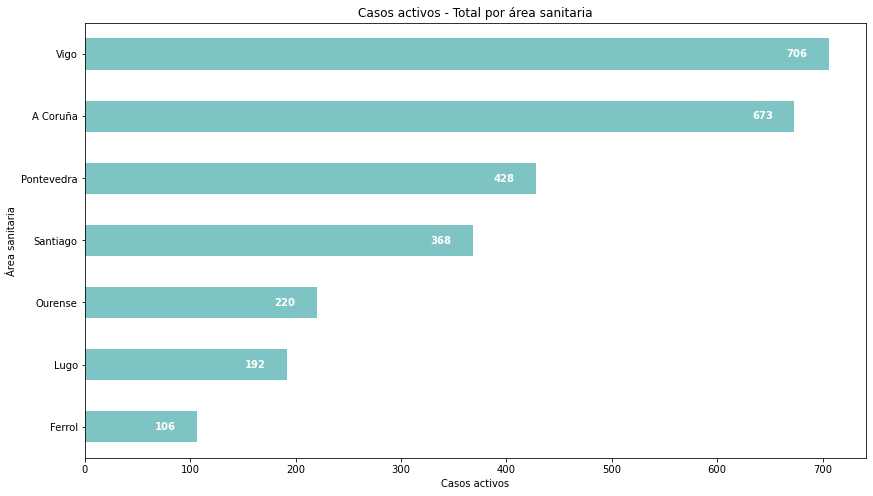

In [4]:
galicia.plotCasosActivos(casos_activos, cienmil=False)

## 2.2. Casos activos - Porcentaje por área sanitaria

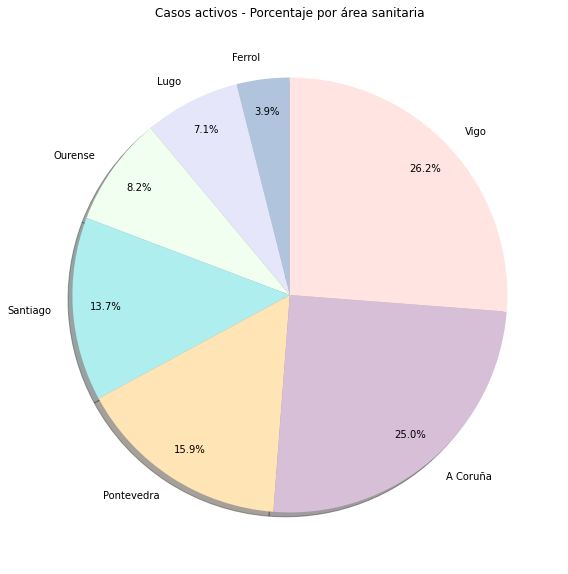

In [5]:
galicia.plotPorcentajeAreas(casos_activos)

## 2.3. Positivos

### 2.3.1. Evolución positivos acumulados últimos 7 días

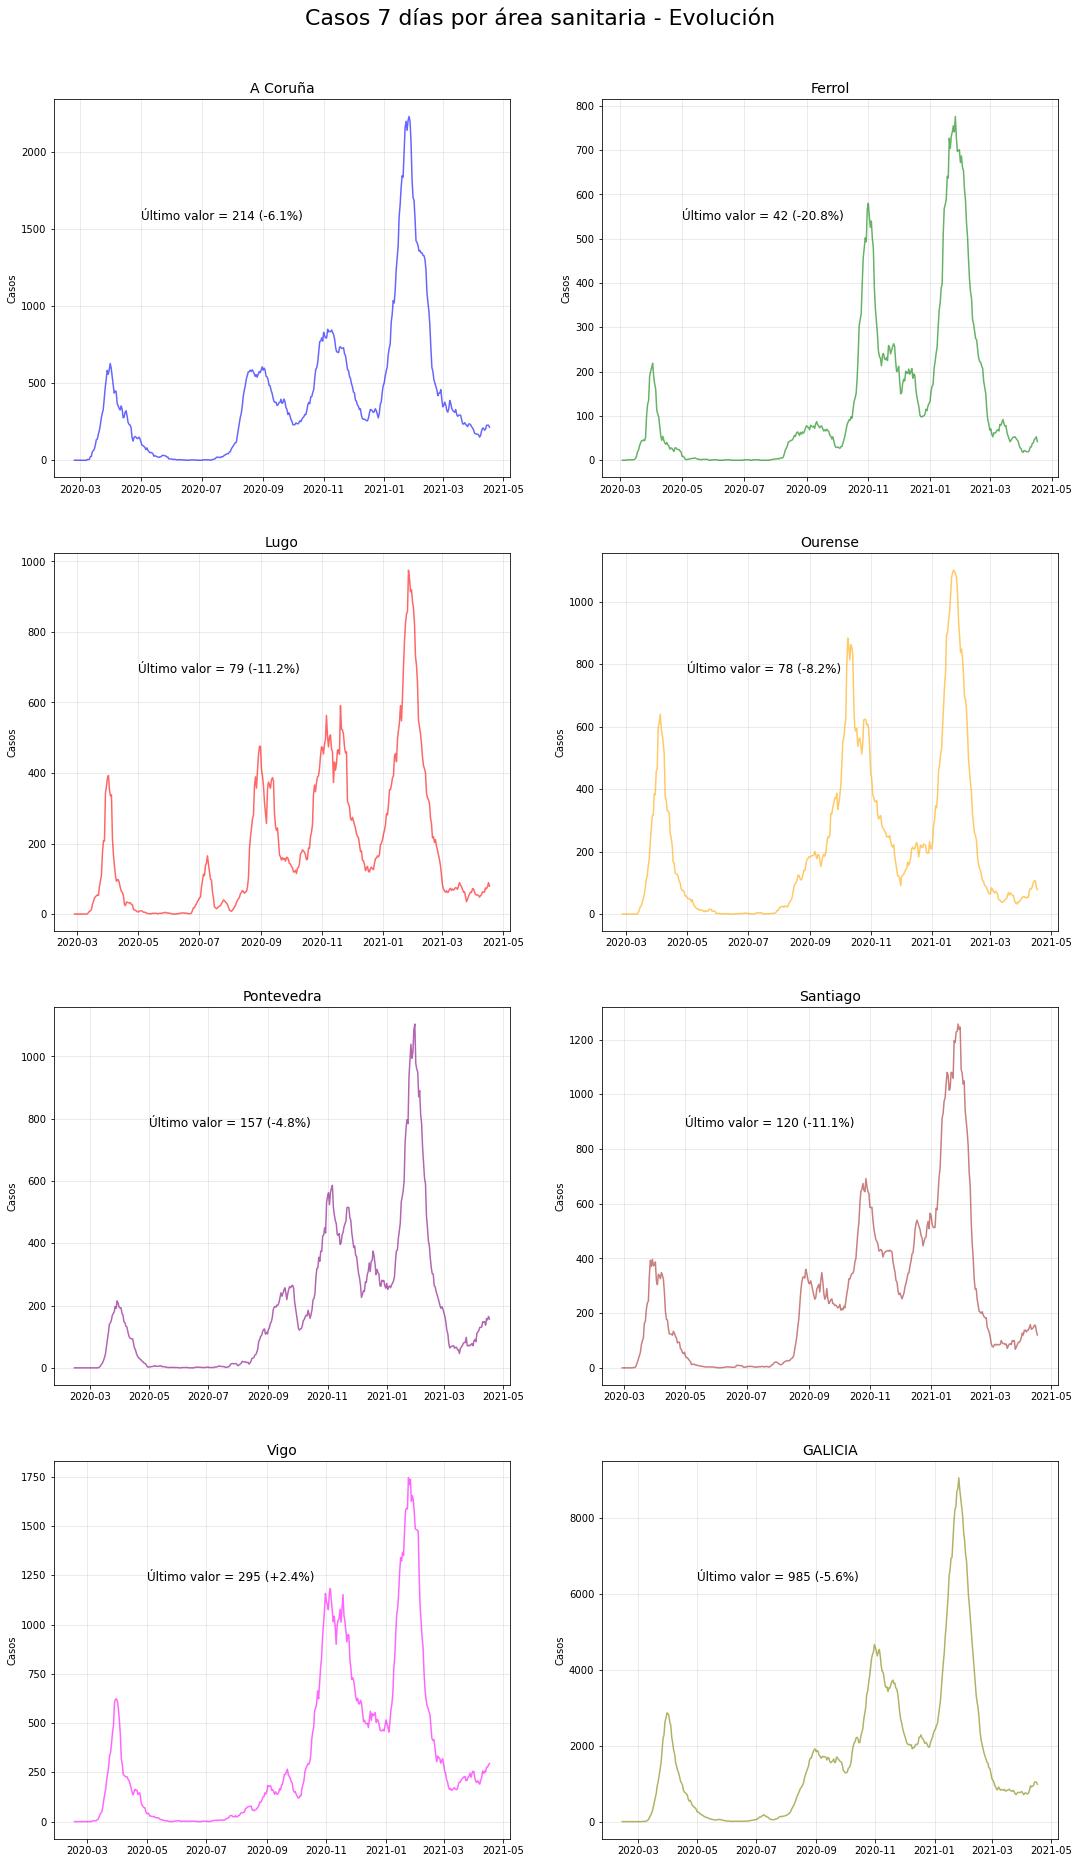

In [6]:
galicia.plotAcumulados(infectados_fecha, kind='Casos', days=7)

### 2.3.2. Comparativo positivos acumulados últimos 7 días

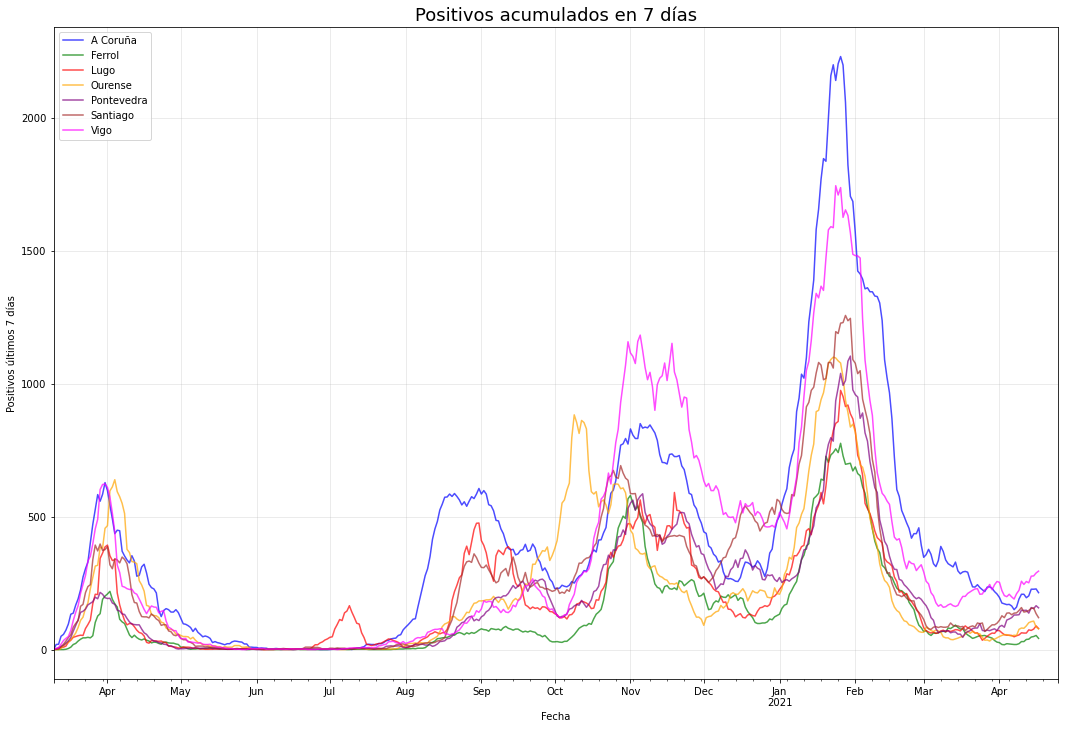

In [7]:
galicia.plotCombinado(infectados_fecha)

### 2.3.3. Principales ciudades - Incidencia 14 días / 100.000 habitantes

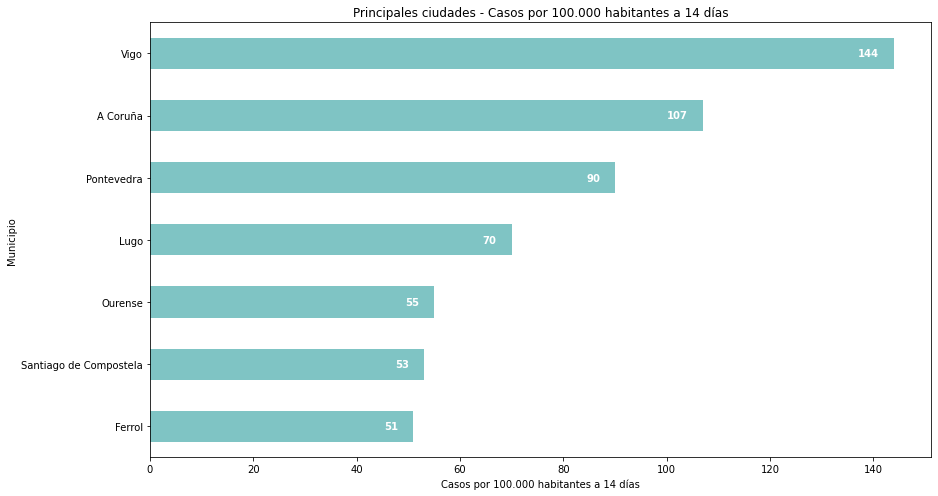

In [8]:
galicia.plotIncidenciaAcumulada(inc14, 'ciudades')

### 2.3.4. Top 10 municipios con mayor incidencia 14 días / 100.000 habitantes

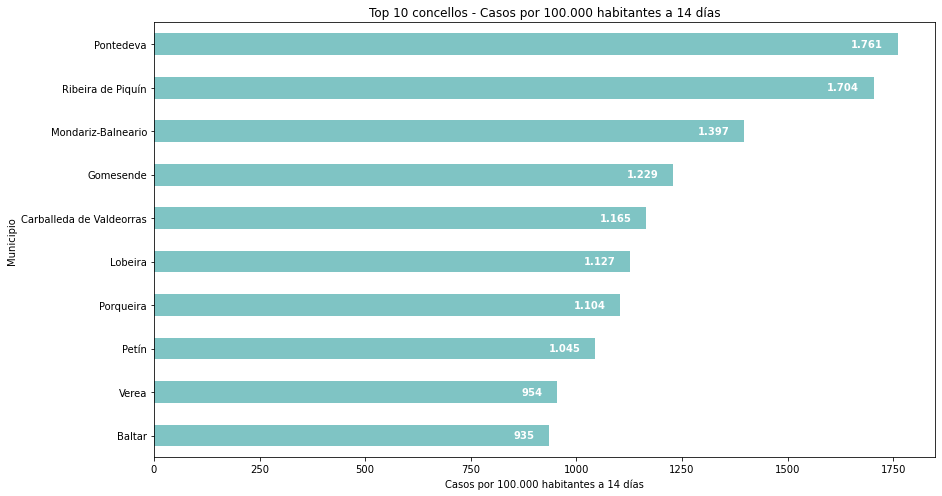

In [9]:
galicia.plotIncidenciaAcumulada(inc14, 'top10')

## 2.4. Evolución PCR acumuladas 7 días

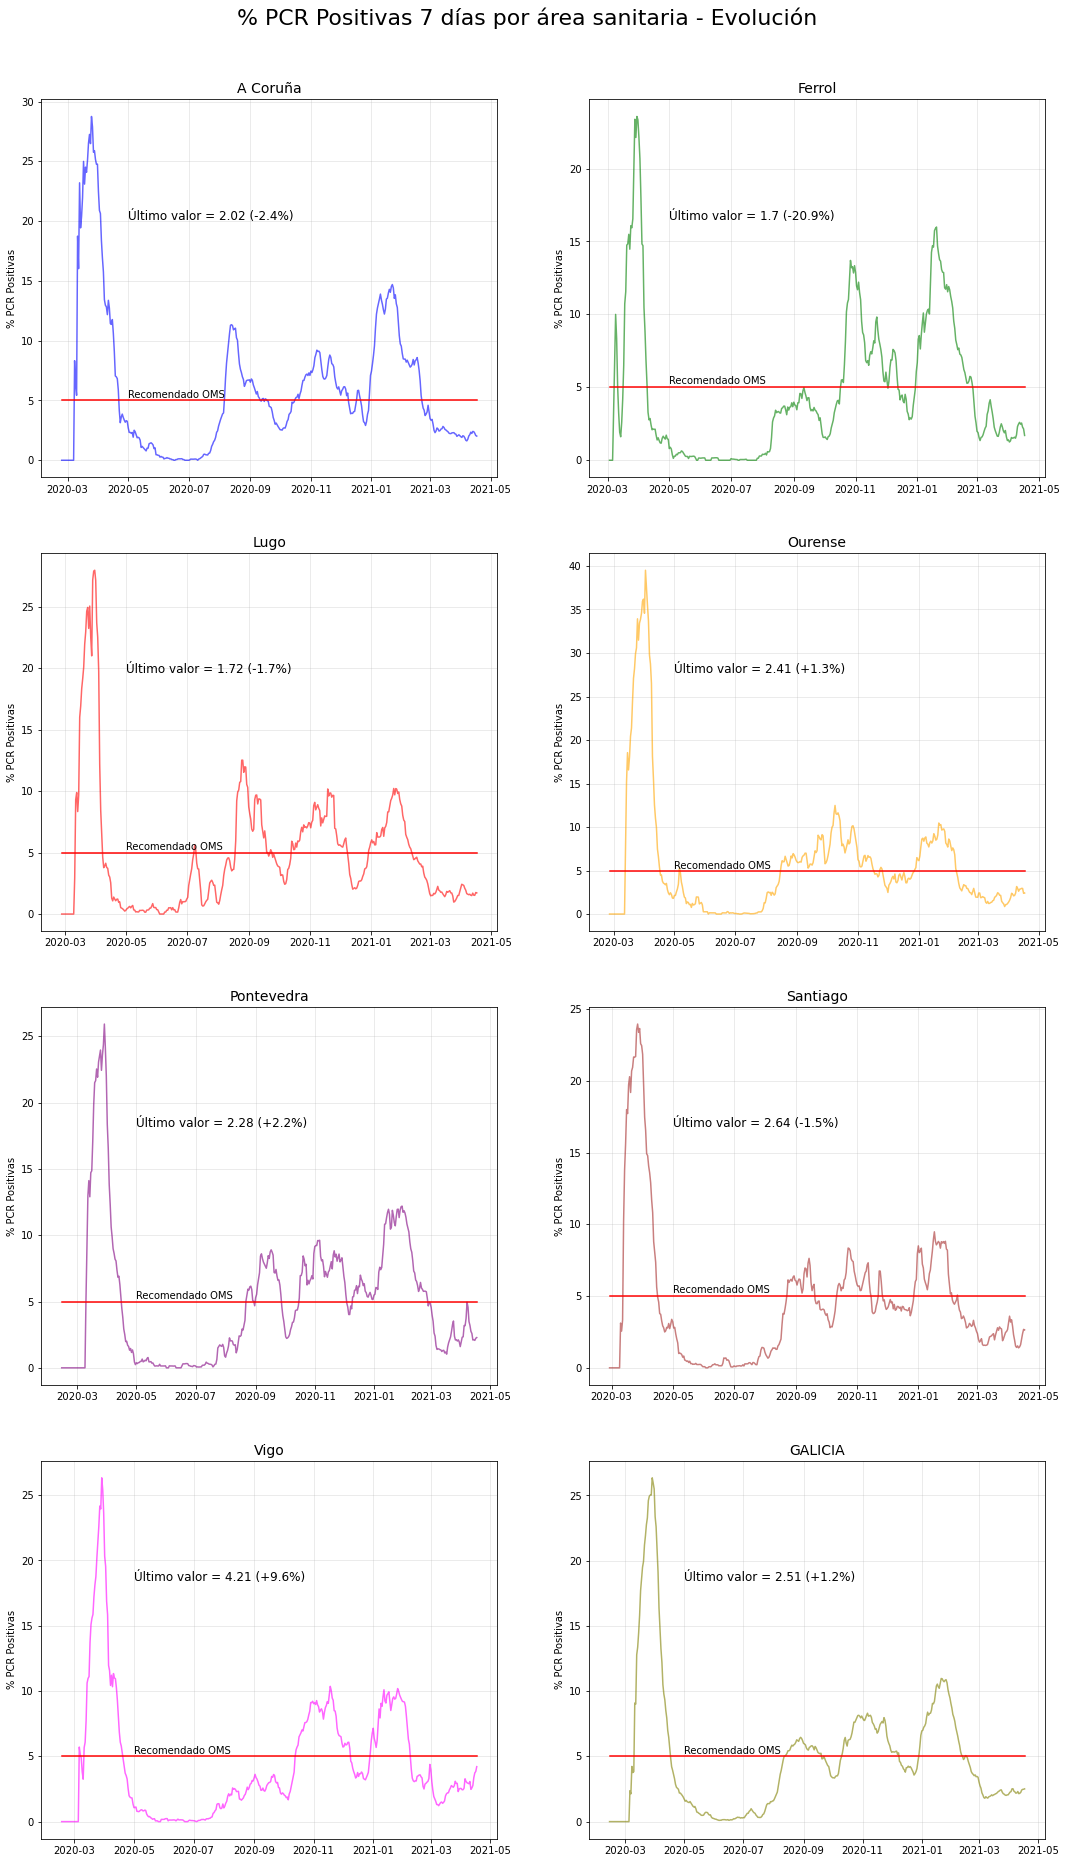

In [10]:
galicia.plotAcumulados(infectados_fecha, kind='PCR', days=7)

## 2.5. Tendencias

### 2.5.1. Clara tendencia en aumento

In [11]:
inc14 = inc14[inc14['Tendencia'].notna()]
inc14 = inc14[inc14['Casos7'] != inc14['Casos']]
inc14.sort_values('Tendencia', ascending=False)
incrementos = list(inc14['Municipio'][inc14['Tendencia'] > 10])
incrementos.sort()
print(*incrementos, sep=', ')

A Coruña, As Pontes de García Rodríguez, Baiona, Barreiros, Burela, Cambados, Cambre, Cangas, Carballo, Carral, Catoira, Ferrol, Gondomar, Lalín, Lugo, Marín, Meaño, Moaña, Monforte de Lemos, Narón, Nigrán, O Carballiño, Oleiros, Poio, Ponteareas, Redondela, Rianxo, Ribadeo, Ribadumia, Ribeira, Rois, Soutomaior, Teo, Tui, Vilagarcía de Arousa, Vilanova de Arousa, Vimianzo


### 2.5.2. Clara tendencia en descenso

In [12]:
descensos = list(inc14['Municipio'][inc14['Tendencia'] < -10])
descensos.sort()
print(*descensos, sep=', ')

A Baña, A Cañiza, A Fonsagrada, A Guarda, A Gudiña, A Pobra do Caramiñal, Allariz, Ames, Amoeiro, Arzúa, As Nogais, Baralla, Becerreá, Bergondo, Boiro, Bueu, Cariño, Castrelo do Val, Cerdedo-Cotobade, Cervo, Dodro, Fisterra, Gomesende, Laza, Lousame, Láncara, Mondariz-Balneario, Mondoñedo, Monterrei, Mos, Muxía, O Corgo, O Grove, O Irixo, Oia, Padrón, Pantón, Porqueira, Porto do Son, Rubiá, Santiago de Compostela, Silleda, Sober, Taboadela, Toques, Valga, Vilardevós, Vilasantar


## 2.6. Ocupación actual de camas

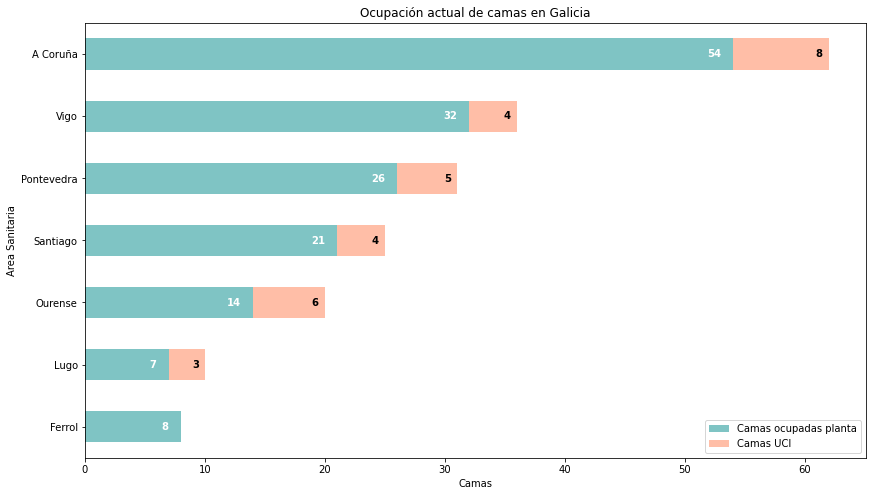

In [13]:
galicia.plotOcupacionCamas(camas)

## 2.7. Fallecidos

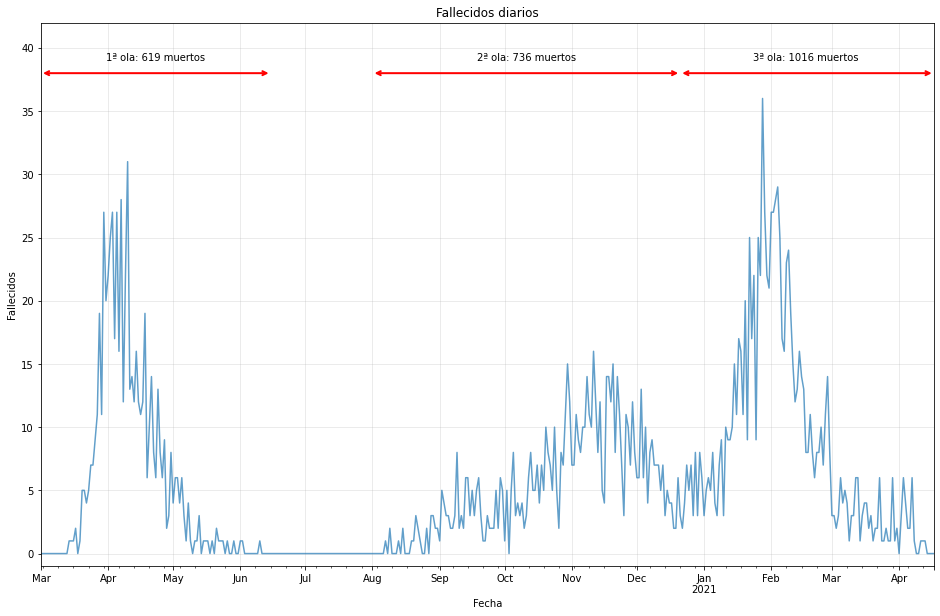

In [14]:
galicia.plotFallecidos(fallecidos)